In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

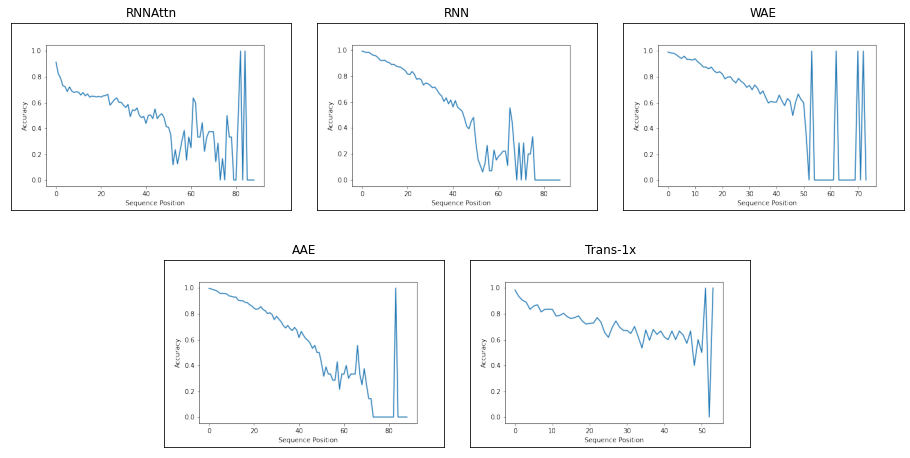

In [2]:
fig = plt.figure(figsize=(16,8))

ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
img = plt.imread("model_analyses//rnnattn-128_peptide_latent_64//token_position_accuracy.png")
ax1.set_title('RNNAttn')
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
plt.imshow(img)

ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
img = plt.imread("model_analyses//rnn-128_peptide_latent_64//token_position_accuracy.png")
ax2.set_title('RNN')
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
plt.imshow(img)

ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
img = plt.imread("model_analyses//wae-128_peptide_latent_64//token_position_accuracy.png")
ax3.set_title('WAE')
ax3.xaxis.set_ticks([])
ax3.yaxis.set_ticks([])
plt.imshow(img)

ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
img = plt.imread("model_analyses//aae-128_peptide_latent_64//token_position_accuracy.png")
ax4.set_title('AAE')
ax4.xaxis.set_ticks([])
ax4.yaxis.set_ticks([])
plt.imshow(img)

ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)
img = plt.imread("model_analyses//trans1x-128_peptide_latent_64//token_position_accuracy.png")
ax5.set_title('Trans-1x')
ax5.xaxis.set_ticks([])
ax5.yaxis.set_ticks([])
plt.imshow(img)



In [3]:
df_list = []
glob_list = glob.glob("model_analyses"+"//**//*.csv", recursive = True) #searcg all the analyses to find the CSV's
for csv in glob_list:
    df_list.append([pd.read_csv(csv),csv]) #create and store a tuple which contains the dataframe and the directory
    

In [4]:
metric_list = pd.DataFrame()
for df_tuple in df_list:
    df_tuple[0]['model'] = df_tuple[1] #add a column with the model name
    #grab 1st element of cols: 2->last
    metric_list = metric_list.append(df_tuple[0].loc[0,df_tuple[0].columns[2]:df_tuple[0].columns[-1]]) 

In [5]:
metric_list.head(3)

,property prediction accuracy,MCC,sequence accuracy,token accuracy,latent_to_func_sil,PCA_to_func_sil,latent_to_PCA_trustworthiness,latent_to_PCA_continuity,latent_to_PCA_lcmc,latent_to_PCA_steadiness,latent_to_PCA_cohesiveness,model,logvar entropy,mem entropy,mu entropy
0,0.979,Data error Division by zero,0.761,0.879566,0.133580,0.266722,0.880205,0.942016,0.265123,0.779856,0.789549,model_analyses\aae-128_peptide_latent_64\saved...,NaN,NaN,NaN
0,0.955,Data error Division by zero,0.770,0.881745,0.018695,0.016790,NaN,NaN,NaN,NaN,NaN,model_analyses\rnn-128_peptide\saved_info.csv,360.67113,380.461719,379.223752
0,0.981,Data error Division by zero,0.729,0.854105,0.051846,0.079841,0.818762,0.895320,0.237501,0.792871,0.768899,model_analyses\rnn-128_peptide_latent_64\saved...,317.28892,369.222717,368.540702


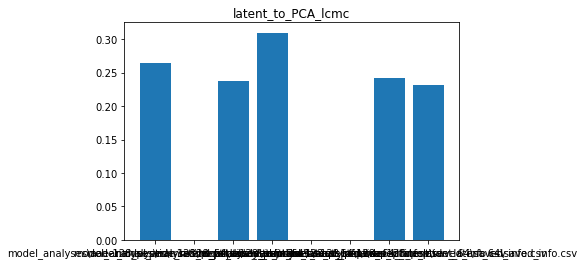

In [7]:
fig, ax = plt.subplots()
rect = ax.bar(x=metric_list['model'],height=metric_list.iloc[:,8] ) 
ax.set_title(metric_list.columns[8])
plt.show()


# for row in range(len(metric_list)):
#     rect_list.append(ax.bar(x=metric_list['model'],height=metric_list.iat[row,3], label=metric_list.columns[3]))
# ax.legend()
